Function: create_random_variables
Result: (array([0.9201415 , 0.23490649, 0.02851806, ..., 0.91630827, 0.53537578,
       0.68428438]), array([ 0.56092638,  0.65249001, -0.26430117, ..., -0.39099438,
       -0.59980847, -1.71777225]))
Latency: 0.000331s

Function: compute_distribution_properties
Result: {'mean': 0.016035409916350617, 'std': 1.002120406104629, 'min': -3.5123999663307286, 'max': 3.423469827024256}
Latency: 0.000230s

Function: estimate_marginal_probability
Result: 0.3178
Latency: 0.001700s

Function: estimate_conditional_probability
Result: 0.5026964560862865
Latency: 0.003206s

Function: chain_rule_example
Result: 0.168
Latency: 0.000002s

Function: check_independence
Result: False
Latency: 0.003952s

Function: compute_statistics
Result: {'E[X]': 0.49540886379346266, 'E[Y]': 0.016035409916350617, 'Var(X)': 0.083575954153061, 'Var(Y)': 1.0042453083313063, 'Cov(X,Y)': 0.0059208286545233}
Latency: 0.000532s

Function: sample_common_distributions
Result: {'normal': array([ 

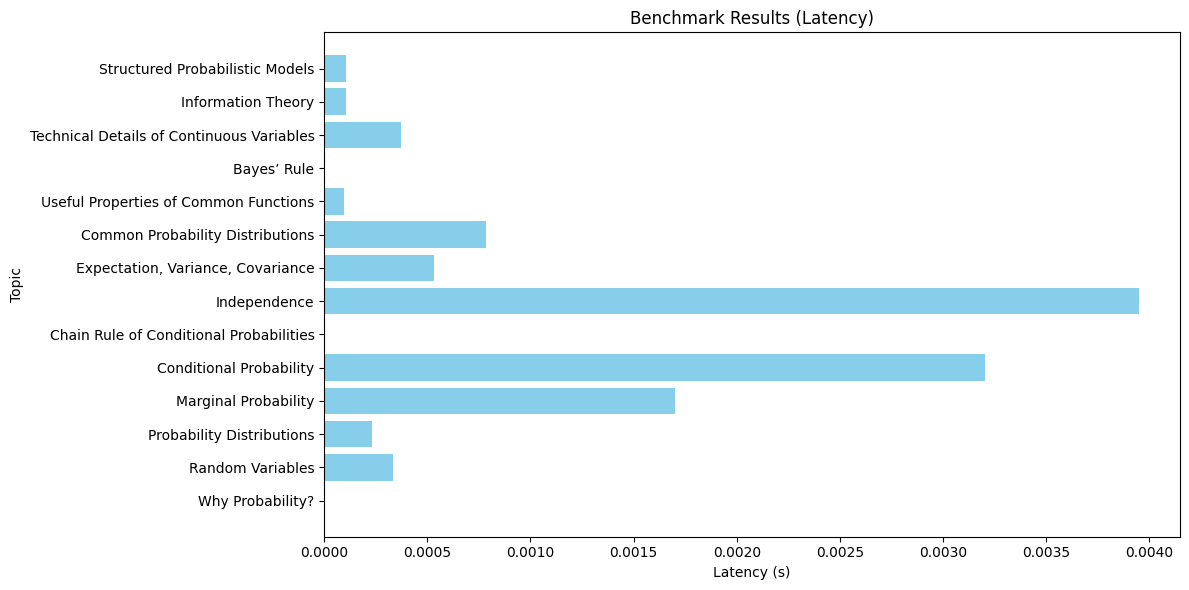

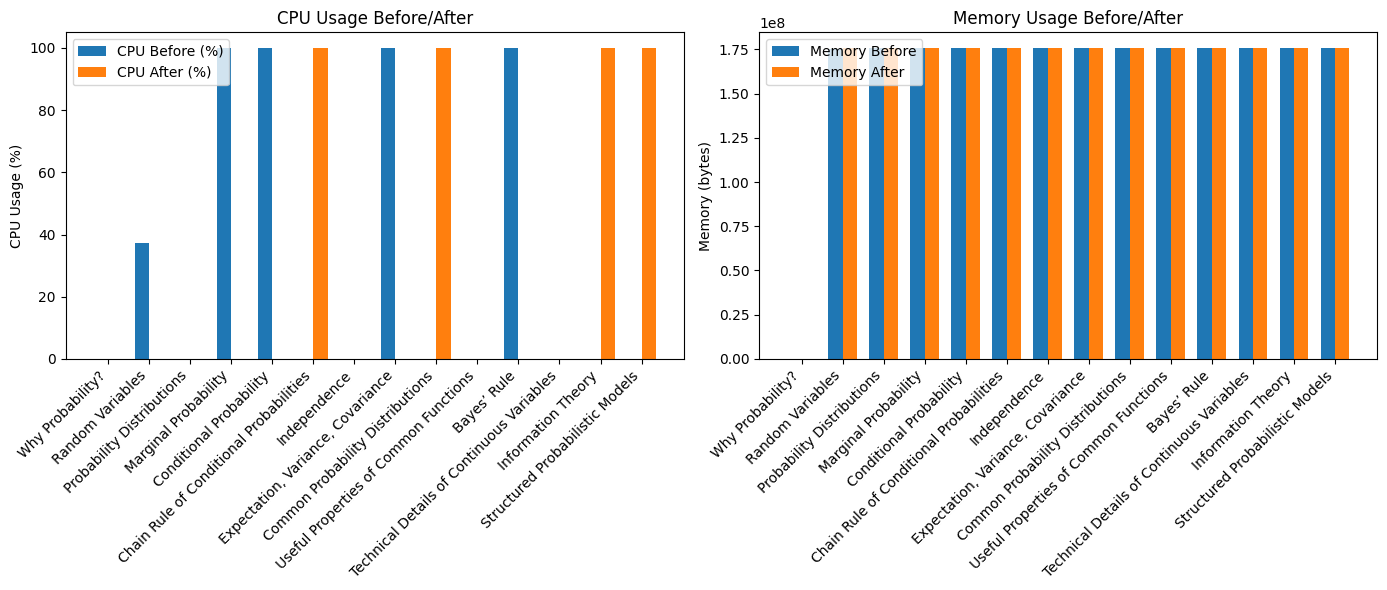

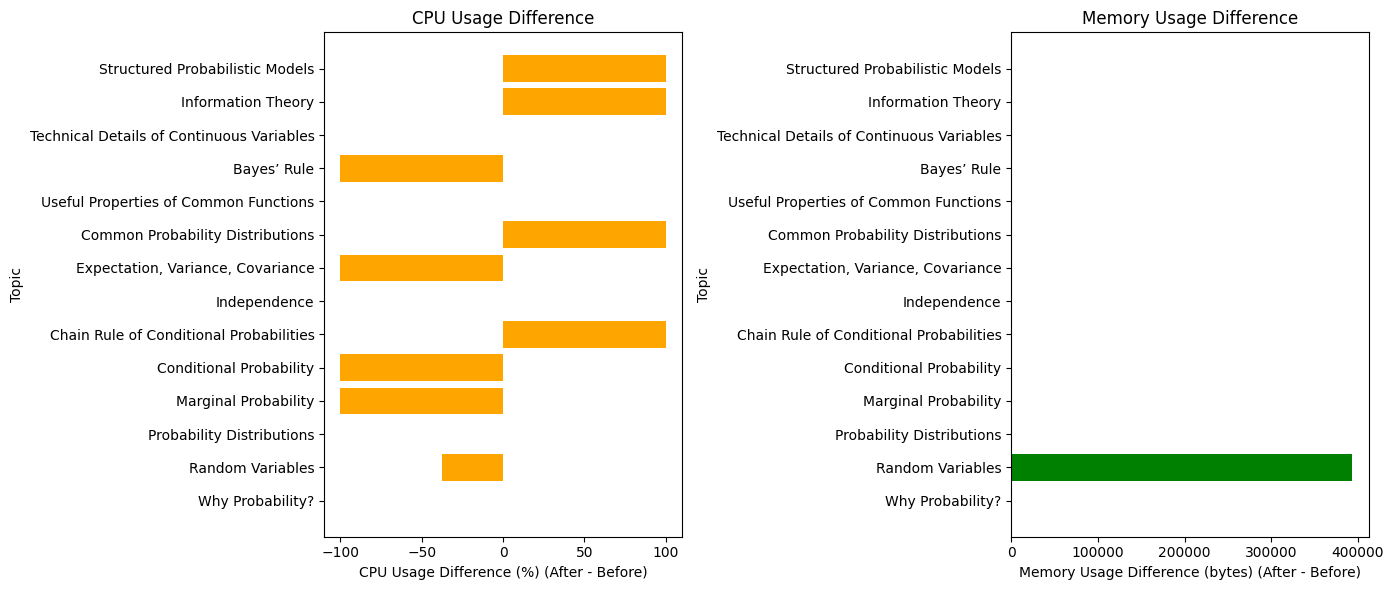

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

try:
    import psutil  # Optional for CPU and memory usage
    PSUTIL_AVAILABLE = True
except ImportError:
    PSUTIL_AVAILABLE = False

# ------------------------------------------------------------------------------
# GLOBAL BENCHMARK LIST AND HELPER FUNCTION
# ------------------------------------------------------------------------------
benchmark_results = []

def benchmark_function(func, *args, **kwargs):
    """
    Benchmarks a function's latency and collects extra metrics (CPU, memory, etc. if psutil is available).
    Returns:
        result: output of the function
        metrics: dictionary with various measured metrics
    """
    cpu_before = psutil.cpu_percent(interval=None) if PSUTIL_AVAILABLE else None
    mem_before = psutil.Process().memory_info().rss if PSUTIL_AVAILABLE else None
    start_time = time.time()

    # Run the function
    result = func(*args, **kwargs)

    end_time = time.time()
    latency = end_time - start_time
    cpu_after = psutil.cpu_percent(interval=None) if PSUTIL_AVAILABLE else None
    mem_after = psutil.Process().memory_info().rss if PSUTIL_AVAILABLE else None

    # Construct the metrics dictionary
    metrics = {
        "latency_s": latency,
        "cpu_percent_before": cpu_before,
        "cpu_percent_after": cpu_after,
        "memory_usage_before_bytes": mem_before,
        "memory_usage_after_bytes": mem_after,
        "input_shapes": [arg.shape if hasattr(arg, "shape") else None for arg in args],
        "output_shape": result.shape if (isinstance(result, np.ndarray)) else None
    }

    # Print or log the function name, result, and latency for quick reference
    print(f"Function: {func.__name__}")
    # If the result is large, omit direct printing
    if isinstance(result, np.ndarray) and result.size > 20:
        print("Result array too large to display.")
    else:
        print(f"Result: {result}")
    print(f"Latency: {latency:.6f}s\n")

    return result, metrics


# ------------------------------------------------------------------------------
# 3.1 Why Probability?
# (Minimal placeholder - we won't do any computations here.)
# ------------------------------------------------------------------------------
benchmark_results.append({
    "Topic": "Why Probability?",
    "Latency (s)": 0.0,
    "CPU Before (%)": None,
    "CPU After (%)": None,
    "Memory Before (bytes)": None,
    "Memory After (bytes)": None
})

# ------------------------------------------------------------------------------
# 3.2 Random Variables
# ------------------------------------------------------------------------------
def create_random_variables(num_samples=1000):
    """
    Creates random variables from different distributions and returns them.
    For demonstration:
      - Uniform(0,1)
      - Normal(0,1)
    """
    uniform_rv = np.random.rand(num_samples)
    normal_rv = np.random.randn(num_samples)
    return uniform_rv, normal_rv

rv_result, rv_metrics = benchmark_function(create_random_variables, 5000)
benchmark_results.append({
    "Topic": "Random Variables",
    "Latency (s)": rv_metrics["latency_s"],
    "CPU Before (%)": rv_metrics["cpu_percent_before"],
    "CPU After (%)": rv_metrics["cpu_percent_after"],
    "Memory Before (bytes)": rv_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": rv_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.3 Probability Distributions
# ------------------------------------------------------------------------------
def compute_distribution_properties(data):
    """
    Example: computes the mean, std, min, and max of data.
    This is a basic demonstration of distribution properties.
    """
    return {
        "mean": np.mean(data),
        "std": np.std(data),
        "min": np.min(data),
        "max": np.max(data)
    }

dist_result, dist_metrics = benchmark_function(compute_distribution_properties, rv_result[1])
benchmark_results.append({
    "Topic": "Probability Distributions",
    "Latency (s)": dist_metrics["latency_s"],
    "CPU Before (%)": dist_metrics["cpu_percent_before"],
    "CPU After (%)": dist_metrics["cpu_percent_after"],
    "Memory Before (bytes)": dist_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": dist_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.4 Marginal Probability
# ------------------------------------------------------------------------------
def estimate_marginal_probability(data, threshold=0.0):
    """
    For demonstration, let's assume "marginal probability" is P(X > threshold).
    We'll compute the empirical proportion of values > threshold.
    """
    return np.mean(data > threshold)

marg_result, marg_metrics = benchmark_function(estimate_marginal_probability, rv_result[1], 0.5)
benchmark_results.append({
    "Topic": "Marginal Probability",
    "Latency (s)": marg_metrics["latency_s"],
    "CPU Before (%)": marg_metrics["cpu_percent_before"],
    "CPU After (%)": marg_metrics["cpu_percent_after"],
    "Memory Before (bytes)": marg_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": marg_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.5 Conditional Probability
# ------------------------------------------------------------------------------
def estimate_conditional_probability(data_x, data_y, condition_func):
    """
    Suppose we want P(X>0.5 | Y>0). We'll define some condition_func(Y)
    and compute empirical conditional probability:
        # of (X>0.5 AND condition_func(Y)) / # of condition_func(Y)
    """
    idx_condition = condition_func(data_y)
    # Just an example, X>0.5
    numerator = np.sum((data_x > 0.5) & idx_condition)
    denominator = np.sum(idx_condition)
    return numerator / max(1, denominator)

def y_positive(y_array):
    return y_array > 0

cond_result, cond_metrics = benchmark_function(estimate_conditional_probability, rv_result[0], rv_result[1], y_positive)
benchmark_results.append({
    "Topic": "Conditional Probability",
    "Latency (s)": cond_metrics["latency_s"],
    "CPU Before (%)": cond_metrics["cpu_percent_before"],
    "CPU After (%)": cond_metrics["cpu_percent_after"],
    "Memory Before (bytes)": cond_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": cond_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.6 The Chain Rule of Conditional Probabilities
# ------------------------------------------------------------------------------
def chain_rule_example(events):
    """
    For a small demonstration:
    P(A,B,C) = P(A|B,C)*P(B|C)*P(C).
    We'll just assume each is estimated from data. This function
    returns the product of three random factors for demonstration.
    """
    # events is a dictionary with "pA_given_BC", "pB_given_C", "pC"
    return events["pA_given_BC"] * events["pB_given_C"] * events["pC"]

chain_data = {
    "pA_given_BC": 0.6,
    "pB_given_C": 0.7,
    "pC": 0.4
}
chain_result, chain_metrics = benchmark_function(chain_rule_example, chain_data)
benchmark_results.append({
    "Topic": "Chain Rule of Conditional Probabilities",
    "Latency (s)": chain_metrics["latency_s"],
    "CPU Before (%)": chain_metrics["cpu_percent_before"],
    "CPU After (%)": chain_metrics["cpu_percent_after"],
    "Memory Before (bytes)": chain_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": chain_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.7 Independence and Conditional Independence
# ------------------------------------------------------------------------------
def check_independence(data_x, data_y, threshold=1e-3):
    """
    A naive example: if correlation is near zero, consider variables "independent".
    This is not strictly correct in general, but is a simple demonstration.
    """
    corr_coef = np.corrcoef(data_x, data_y)[0, 1]
    return abs(corr_coef) < threshold  # True/False

indep_result, indep_metrics = benchmark_function(check_independence, rv_result[0], rv_result[1], 1e-2)
benchmark_results.append({
    "Topic": "Independence",
    "Latency (s)": indep_metrics["latency_s"],
    "CPU Before (%)": indep_metrics["cpu_percent_before"],
    "CPU After (%)": indep_metrics["cpu_percent_after"],
    "Memory Before (bytes)": indep_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": indep_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.8 Expectation, Variance and Covariance
# ------------------------------------------------------------------------------
def compute_statistics(data_x, data_y):
    """
    Returns E[X], E[Y], var(X), var(Y), and cov(X,Y).
    """
    ex = np.mean(data_x)
    ey = np.mean(data_y)
    varx = np.var(data_x)
    vary = np.var(data_y)
    cov_xy = np.cov(data_x, data_y)[0, 1]
    return {
        "E[X]": ex,
        "E[Y]": ey,
        "Var(X)": varx,
        "Var(Y)": vary,
        "Cov(X,Y)": cov_xy
    }

stat_result, stat_metrics = benchmark_function(compute_statistics, rv_result[0], rv_result[1])
benchmark_results.append({
    "Topic": "Expectation, Variance, Covariance",
    "Latency (s)": stat_metrics["latency_s"],
    "CPU Before (%)": stat_metrics["cpu_percent_before"],
    "CPU After (%)": stat_metrics["cpu_percent_after"],
    "Memory Before (bytes)": stat_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": stat_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.9 Common Probability Distributions
# ------------------------------------------------------------------------------
def sample_common_distributions(n=1000):
    """
    Samples from some commonly used distributions:
      - Standard Normal
      - Binomial(n=10, p=0.5)
      - Poisson(lambda=3)
    Returns them in a dictionary for demonstration.
    """
    normal_data = np.random.randn(n)
    binomial_data = np.random.binomial(n=10, p=0.5, size=n)
    poisson_data = np.random.poisson(lam=3, size=n)
    return {
        "normal": normal_data,
        "binomial": binomial_data,
        "poisson": poisson_data
    }

common_result, common_metrics = benchmark_function(sample_common_distributions, 2000)
benchmark_results.append({
    "Topic": "Common Probability Distributions",
    "Latency (s)": common_metrics["latency_s"],
    "CPU Before (%)": common_metrics["cpu_percent_before"],
    "CPU After (%)": common_metrics["cpu_percent_after"],
    "Memory Before (bytes)": common_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": common_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.10 Useful Properties of Common Functions
# (Minimal placeholder for demonstration.)
# ------------------------------------------------------------------------------
def log_exp_properties(x):
    """
    Demonstrates typical "common function" usage like log-sum-exp, etc.
    We'll just do a naive log-sum-exp on x.
    """
    max_x = np.max(x)
    return max_x + np.log(np.sum(np.exp(x - max_x)))

upcf_data = np.random.randn(1000)
upcf_result, upcf_metrics = benchmark_function(log_exp_properties, upcf_data)
benchmark_results.append({
    "Topic": "Useful Properties of Common Functions",
    "Latency (s)": upcf_metrics["latency_s"],
    "CPU Before (%)": upcf_metrics["cpu_percent_before"],
    "CPU After (%)": upcf_metrics["cpu_percent_after"],
    "Memory Before (bytes)": upcf_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": upcf_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.11 Bayes’ Rule
# ------------------------------------------------------------------------------
def bayes_rule(p_b_given_a, p_a, p_b):
    """
    Returns P(A|B) = P(B|A) * P(A) / P(B).
    """
    return (p_b_given_a * p_a) / (p_b + 1e-12)  # small epsilon to avoid /0

bayes_result, bayes_metrics = benchmark_function(bayes_rule, 0.8, 0.4, 0.5)
benchmark_results.append({
    "Topic": "Bayes’ Rule",
    "Latency (s)": bayes_metrics["latency_s"],
    "CPU Before (%)": bayes_metrics["cpu_percent_before"],
    "CPU After (%)": bayes_metrics["cpu_percent_after"],
    "Memory Before (bytes)": bayes_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": bayes_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.12 Technical Details of Continuous Variables
# (Placeholder: e.g., numeric integration of a PDF.)
# ------------------------------------------------------------------------------
def numeric_integration_example(func, lower_bound, upper_bound, num_points=10000):
    """
    Performs a naive numeric integration of a function over a range.
    """
    xs = np.linspace(lower_bound, upper_bound, num_points)
    ys = func(xs)
    dx = (upper_bound - lower_bound) / (num_points - 1)
    return np.sum(ys) * dx

def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

int_result, int_metrics = benchmark_function(numeric_integration_example, normal_pdf, -5, 5, 10000)
benchmark_results.append({
    "Topic": "Technical Details of Continuous Variables",
    "Latency (s)": int_metrics["latency_s"],
    "CPU Before (%)": int_metrics["cpu_percent_before"],
    "CPU After (%)": int_metrics["cpu_percent_after"],
    "Memory Before (bytes)": int_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": int_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.13 Information Theory
# ------------------------------------------------------------------------------
def shannon_entropy(prob_dist):
    """
    Computes the Shannon entropy for a given probability distribution:
    H(X) = - sum(p_i log2 p_i).
    """
    prob_dist = np.array(prob_dist, dtype=float)
    prob_dist /= (np.sum(prob_dist) + 1e-12)  # normalize
    return -np.sum(prob_dist * np.log2(prob_dist + 1e-12))

it_data = np.random.rand(10)  # random distribution for demonstration
it_result, it_metrics = benchmark_function(shannon_entropy, it_data)
benchmark_results.append({
    "Topic": "Information Theory",
    "Latency (s)": it_metrics["latency_s"],
    "CPU Before (%)": it_metrics["cpu_percent_before"],
    "CPU After (%)": it_metrics["cpu_percent_after"],
    "Memory Before (bytes)": it_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": it_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 3.14 Structured Probabilistic Models
# (Placeholder: minimal demonstration of a joint distribution with multiple variables.)
# ------------------------------------------------------------------------------
def joint_distribution_example(*variables):
    """
    A trivial example of "structured model":
    We multiply values in a naive manner to get a 'joint probability'.
    Obviously not a real structured model, just for demonstration.
    """
    # Multiply all arrays' means as if they were "independent"
    product_means = 1.0
    for var in variables:
        product_means *= np.mean(var)
    return product_means

spm_result, spm_metrics = benchmark_function(joint_distribution_example, rv_result[0], rv_result[1], upcf_data)
benchmark_results.append({
    "Topic": "Structured Probabilistic Models",
    "Latency (s)": spm_metrics["latency_s"],
    "CPU Before (%)": spm_metrics["cpu_percent_before"],
    "CPU After (%)": spm_metrics["cpu_percent_after"],
    "Memory Before (bytes)": spm_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": spm_metrics["memory_usage_after_bytes"]
})


# ------------------------------------------------------------------------------
# VISUALIZATION FUNCTIONS
# ------------------------------------------------------------------------------
def plot_benchmark_results(results):
    """
    Plots the benchmark latency results in a horizontal bar chart.
    """
    benchmark_df = pd.DataFrame(results)

    # Convert None metrics to 0 for plotting clarity
    benchmark_df["Latency (s)"] = benchmark_df["Latency (s)"].fillna(0)

    plt.figure(figsize=(12, 6))
    plt.barh(benchmark_df["Topic"], benchmark_df["Latency (s)"], color="skyblue")
    plt.xlabel("Latency (s)")
    plt.ylabel("Topic")
    plt.title("Benchmark Results (Latency)")
    plt.tight_layout()
    plt.show()

def plot_cpu_memory_usage(results):
    """
    Creates side-by-side bar charts for CPU usage (before vs. after) and
    memory usage (before vs. after).
    """
    benchmark_df = pd.DataFrame(results)
    # Replace None with 0 for plotting
    benchmark_df["CPU Before (%)"] = benchmark_df["CPU Before (%)"].fillna(0)
    benchmark_df["CPU After (%)"] = benchmark_df["CPU After (%)"].fillna(0)
    benchmark_df["Memory Before (bytes)"] = benchmark_df["Memory Before (bytes)"].fillna(0)
    benchmark_df["Memory After (bytes)"] = benchmark_df["Memory After (bytes)"].fillna(0)

    x = np.arange(len(benchmark_df))
    width = 0.35

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # CPU usage (left)
    axs[0].bar(x - width/2, benchmark_df["CPU Before (%)"], width, label="CPU Before (%)")
    axs[0].bar(x + width/2, benchmark_df["CPU After (%)"], width, label="CPU After (%)")
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(benchmark_df["Topic"], rotation=45, ha='right')
    axs[0].set_ylabel("CPU Usage (%)")
    axs[0].set_title("CPU Usage Before/After")
    axs[0].legend()

    # Memory usage (right)
    axs[1].bar(x - width/2, benchmark_df["Memory Before (bytes)"], width, label="Memory Before")
    axs[1].bar(x + width/2, benchmark_df["Memory After (bytes)"], width, label="Memory After")
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(benchmark_df["Topic"], rotation=45, ha='right')
    axs[1].set_ylabel("Memory (bytes)")
    axs[1].set_title("Memory Usage Before/After")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

def plot_cpu_memory_diff(results):
    """
    Plots the difference (After - Before) for CPU usage and memory usage.
    """
    benchmark_df = pd.DataFrame(results)
    benchmark_df["CPU Before (%)"] = benchmark_df["CPU Before (%)"].fillna(0)
    benchmark_df["CPU After (%)"] = benchmark_df["CPU After (%)"].fillna(0)
    benchmark_df["Memory Before (bytes)"] = benchmark_df["Memory Before (bytes)"].fillna(0)
    benchmark_df["Memory After (bytes)"] = benchmark_df["Memory After (bytes)"].fillna(0)

    benchmark_df["CPU_Usage_Diff"] = benchmark_df["CPU After (%)"] - benchmark_df["CPU Before (%)"]
    benchmark_df["Memory_Usage_Diff"] = benchmark_df["Memory After (bytes)"] - benchmark_df["Memory Before (bytes)"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # CPU difference
    axs[0].barh(benchmark_df["Topic"], benchmark_df["CPU_Usage_Diff"], color="orange")
    axs[0].set_xlabel("CPU Usage Difference (%) (After - Before)")
    axs[0].set_ylabel("Topic")
    axs[0].set_title("CPU Usage Difference")

    # Memory difference
    axs[1].barh(benchmark_df["Topic"], benchmark_df["Memory_Usage_Diff"], color="green")
    axs[1].set_xlabel("Memory Usage Difference (bytes) (After - Before)")
    axs[1].set_ylabel("Topic")
    axs[1].set_title("Memory Usage Difference")

    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------------------------
# PLOTTING THE RESULTS
# ------------------------------------------------------------------------------
plot_benchmark_results(benchmark_results)
plot_cpu_memory_usage(benchmark_results)
plot_cpu_memory_diff(benchmark_results)